# Improve Training Time of Machine Learning Model using Bagging

## How Bagging works

First of all we will try to understandwhat Bagging is from the following diagram:  

Let's say we have a dataset to train the model, first we need to divide this dataset into *number of datasets(atleast more than 2)*. And then we need to apply classifier on each of the dataset seperately then finally we do aggregation to get the output:

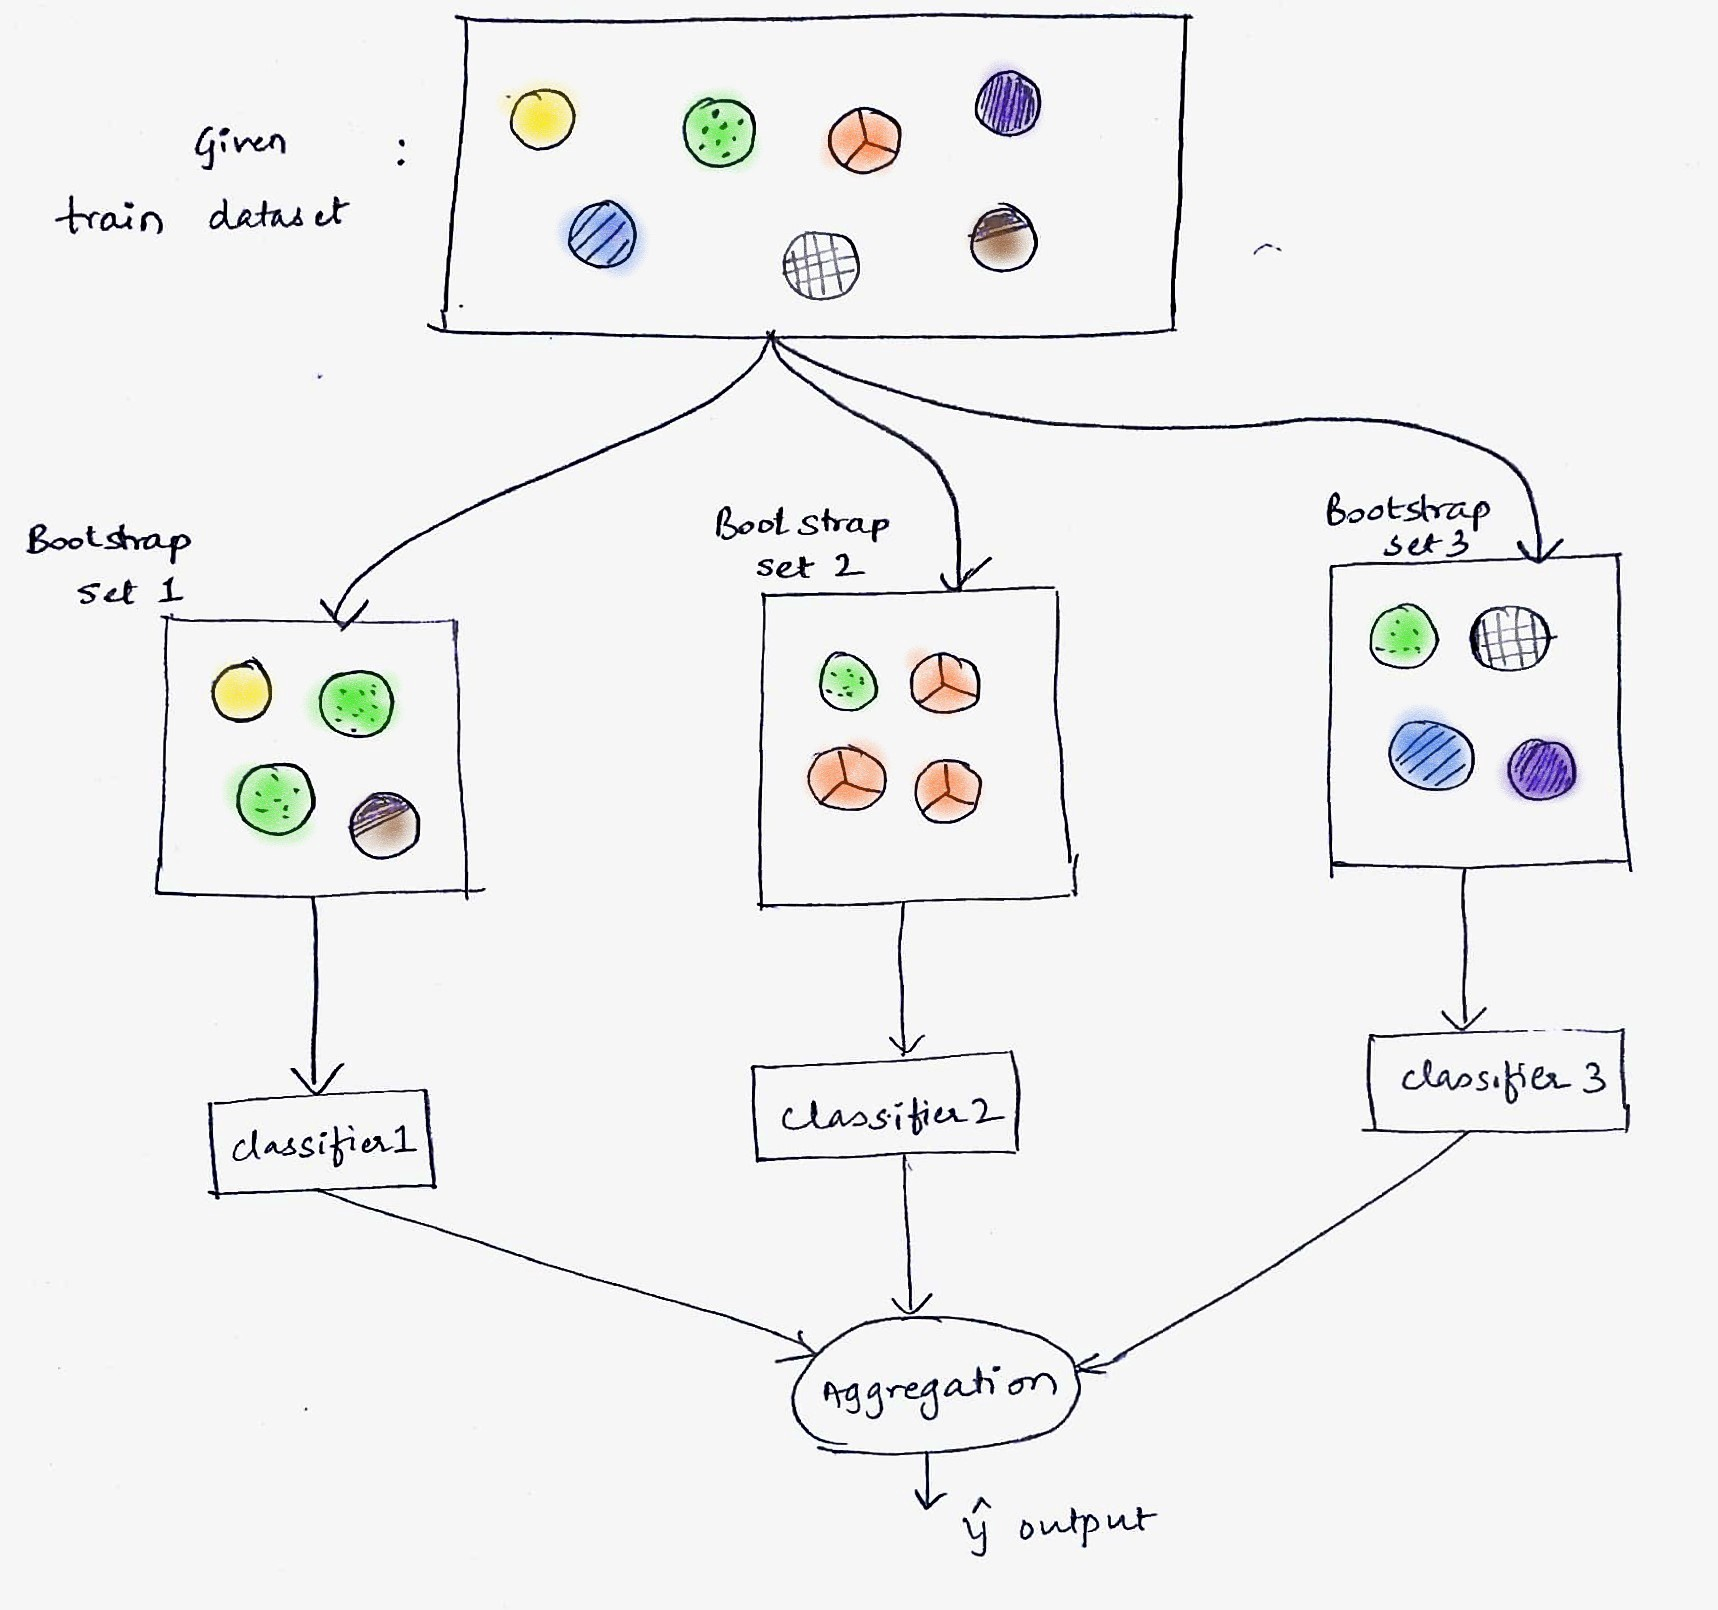

SVM time complexity = $O(n^3)$

i.e. As we increase number of input samples, training time increases cubically.

### For example

If **1000 input samples** take **10 seconds** to train then **3000 input samples** might take **$10 * 3^3$ seconds** to train.

If we divide 3000 samples into 3 categories each dataset contain 1000 samples. To train each dataset it will take 10 seconds in this way it will get over all time to train is **30sec(10+10+10)**. In this way we can improve training time of machine learning model.

Instead of 270 sec, if we divide into 3 sets it will take 30 sec.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X.shape, y.shape

((150, 4), (150,))

So x has 150 samples and 4 attributes, and y has 150 examples. We know 150 samples are less number of samples in machine learning. So to get more number of samples we will use repeat() function.  

We will repeat these 150 samples to 1000 times then we will get 150000 samples.

In [5]:
X = np.repeat(X, repeats=1000, axis=0)
y = np.repeat(y, repeats=1000, axis=0)

In [6]:
X.shape, y.shape

((150000, 4), (150000,))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
X_train.shape, y_train.shape

((112500, 4), (112500,))

## Train without ***Bagging***

Now to train the model without bagging we will create a classifier caller SVC() with linear kernel

In [9]:
%%time
clf = SVC(kernel='linear', probability=True, class_weight='balanced')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('SVC: ', metrics.accuracy_score(y_test, y_predict))

SVC:  0.9865066666666666
CPU times: user 46.5 s, sys: 388 ms, total: 46.9 s
Wall time: 46.7 s


## Train it with ***Bagging***

Now we train the model with bagging we will create a classifier called BaggingClassifier() with linear kernel

In [10]:
%%time
n_estimators = 10

clf = BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), n_estimators=n_estimators, max_samples=1.0/n_estimators)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('SVC: ', metrics.accuracy_score(y_test, y_predict))

SVC:  0.9806666666666667
CPU times: user 7.26 s, sys: 31.1 ms, total: 7.29 s
Wall time: 7.3 s


So from the above result we can observe improvement training time of the model from ***46.7 sec*** to ***7.3 sec***